**HW1 linear regression**



In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore') 
warnings.simplefilter(action="ignore",category=UserWarning)
warnings.simplefilter(action="ignore",category=FutureWarning)

In [ ]:
import pandas as pd
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ข้อ 1 : Tensile Strength

ขั้นตอนที่ 1 : การสร้าง DataFrame ข้อมูลสำหรับการเข้าสู่ Model

In [ ]:
SmokeData = {'Strength':[167,171,175,182,184,181,188,193,195,200]
             ,'Percent_Hardwood':[10,15,15,20,20,20,25,25,28,30]}
Smoke_df = pd.DataFrame(SmokeData)
Smoke_df.head(10)

,Strength,Percent_Hardwood
0,167,10
1,171,15
2,175,15
3,182,20
4,184,20
5,181,20
6,188,25
7,193,25
8,195,28
9,200,30


ขั้นตอนที่ 2 : ทำการ Fit model linear regression

In [ ]:
formula = 'Strength ~ Percent_Hardwood '
tensile_lm = ols(formula, data=Smoke_df).fit()
tensile_lm

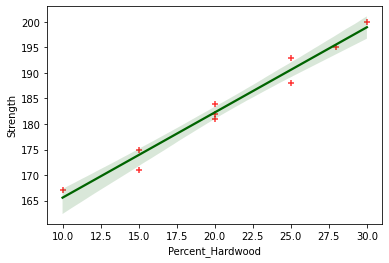

In [ ]:
sns.regplot( x="Percent_Hardwood" , y="Strength", data=Smoke_df
            , scatter_kws={"color": "red"}, line_kws={"color": "darkgreen"}, marker="+");

In [ ]:
tensile_lm.summary2()  #Checking and summary significance parameter

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:                OLS              Adj. R-squared:     0.967   
Dependent Variable:   Strength         AIC:                43.4973 
Date:                 2021-09-29 05:06 BIC:                44.1025 
No. Observations:     10               Log-Likelihood:     -19.749 
Df Model:             1                F-statistic:        261.6   
Df Residuals:         8                Prob (F-statistic): 2.15e-07
R-squared:            0.970            Scale:              3.8000  
-------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
-------------------------------------------------------------------
Intercept        148.9217   2.2310 66.7509 0.0000 143.7770 154.0664
Percent_Hardwood   1.6672   0.1031 16.1734 0.0000   1.4295   1.9049
-------------------------------------------------------------------
Omnibus:               1.184         Durbin-Watson:           2.900
Prob(Omnibus):         0.553         Jarque-Bera (JB):        0.810
Skew:                  -0.393        Prob(JB):                0.667
Kurtosis:              1.849         Condition No.:           78   
===================================================================

"""

ข้อ 2 : CO-SMOKE

In [ ]:
!gdown --id 1nFFcSW7pNUnmgg88kty9aKYuCIXkafz2

Downloading...
From: https://drive.google.com/uc?id=1nFFcSW7pNUnmgg88kty9aKYuCIXkafz2
To: /content/Co-smoke.xlsx
100% 9.47k/9.47k [00:00<00:00, 7.01MB/s]


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
CoSmoke = pd.read_excel("/content/Co-smoke.xlsx")

In [ ]:
CoSmoke.head()

,TAR,NICOTINE,WEIGHT,CO
0,14.1,0.86,0.9853,13.6
1,16.0,1.06,1.0938,16.6
2,29.8,2.03,1.1650,23.5
3,8.0,0.67,0.9280,10.2
4,4.1,0.40,0.9462,5.4


In [ ]:
CoSmoke.describe()

,TAR,NICOTINE,WEIGHT,CO
count,25.00000,25.000000,25.000000,25.000000
mean,12.21600,0.876400,0.970284,12.528000
std,5.66581,0.354058,0.087721,4.739684
min,1.00000,0.130000,0.785100,1.500000
25%,8.60000,0.690000,0.922500,10.000000
50%,12.80000,0.900000,0.957300,13.000000
75%,15.10000,1.020000,1.007000,15.400000
max,29.80000,2.030000,1.165000,23.500000


In [ ]:
Y = CoSmoke.CO
X = CoSmoke.drop('CO', axis=1)

In [ ]:
formula = 'CO ~ TAR + NICOTINE + WEIGHT'
CoSmoke_lm = ols(formula, data=CoSmoke).fit()

In [ ]:
CoSmoke_lm.params

Intercept    3.202190
TAR          0.962574
NICOTINE    -2.631661
WEIGHT      -0.130482
dtype: float64

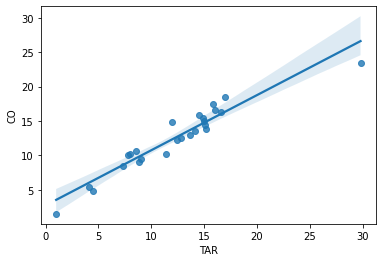

In [ ]:
sns.regplot( x="TAR" , y="CO", data=CoSmoke);

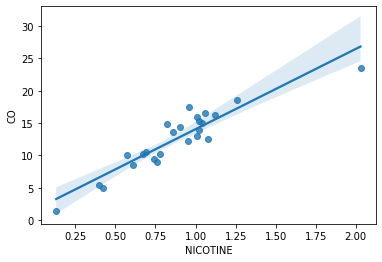

In [ ]:
sns.regplot( x="NICOTINE" , y="CO", data=CoSmoke);

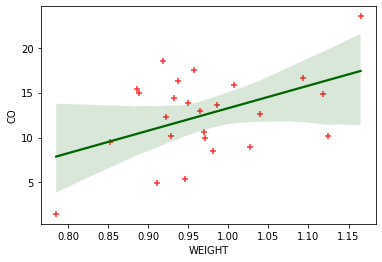

In [ ]:
sns.regplot( x="WEIGHT" , y="CO", data=CoSmoke, scatter_kws={"color": "red"}, line_kws={"color": "darkgreen"}, marker="+");

In [ ]:
print("R-squared: {:.3f}".format(CoSmoke_lm.rsquared))
print("Adjusted R-squared: {:.3f}".format(CoSmoke_lm .rsquared_adj))

R-squared: 0.919
Adjusted R-squared: 0.907


In [ ]:
CoSmoke_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.907   
Dependent Variable: CO               AIC:                93.0187 
Date:               2021-09-29 05:08 BIC:                97.8942 
No. Observations:   25               Log-Likelihood:     -42.509 
Df Model:           3                F-statistic:        78.98   
Df Residuals:       21               Prob (F-statistic): 1.33e-11
R-squared:          0.919            Scale:              2.0901  
------------------------------------------------------------------
              Coef.   Std.Err.     t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept     3.2022    3.4618   0.9250  0.3655   -3.9969  10.4013
TAR           0.9626    0.2422   3.9736  0.0007    0.4588   1.4663
NICOTINE     -2.6317    3.9006  -0.6747  0.5072  -10.7433   5.4800
WEIGHT       -0.1305    3.8853  -0.0336  0.9735   -8.2105   7.9495
-----------------------------------------------------------------
Omnibus:               0.052        Durbin-Watson:          2.860
Prob(Omnibus):         0.974        Jarque-Bera (JB):       0.223
Skew:                  -0.087       Prob(JB):               0.895
Kurtosis:              2.572        Condition No.:          242  
=================================================================

"""

In [ ]:
formula1 = 'CO ~ NICOTINE + WEIGHT'
CoSmoke_lm1 = ols(formula1, data=CoSmoke).fit()

In [ ]:
CoSmoke_lm1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.844   
Dependent Variable: CO               AIC:                105.0357
Date:               2021-09-29 05:08 BIC:                108.6924
No. Observations:   25               Log-Likelihood:     -49.518 
Df Model:           2                F-statistic:        66.13   
Df Residuals:       22               Prob (F-statistic): 4.97e-10
R-squared:          0.857            Scale:              3.4952  
------------------------------------------------------------------
               Coef.   Std.Err.    t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept      1.6140    4.4466  0.3630  0.7201   -7.6078  10.8357
NICOTINE      12.3881    1.2447  9.9524  0.0000    9.8067  14.9695
WEIGHT         0.0588    5.0240  0.0117  0.9908  -10.3602  10.4779
-----------------------------------------------------------------
Omnibus:              0.376        Durbin-Watson:           2.676
Prob(Omnibus):        0.829        Jarque-Bera (JB):        0.520
Skew:                 0.215        Prob(JB):                0.771
Kurtosis:             2.440        Condition No.:           30   
=================================================================

"""

In [ ]:
print("Sum of Squared Errors (SSE): {:.2f}".format(CoSmoke_lm.ssr)) 
print("Sum of Squared Regression (SSR): {:.2f}".format(CoSmoke_lm.ess)) 
print("Sum of Squared Total (SST): {:.2f}".format(CoSmoke_lm.centered_tss)) 
print("Residual df (n-p): {:.0f}".format(CoSmoke_lm.df_resid))
print("Mean Squared errors (MSE): {:.2f}".format(CoSmoke_lm.mse_resid))
print("Standard Errors (Se): {:.2f}".format(np.sqrt(CoSmoke_lm.mse_resid)))

Sum of Squared Errors (SSE): 43.89
Sum of Squared Regression (SSR): 495.26
Sum of Squared Total (SST): 539.15
Residual df (n-p): 21
Mean Squared errors (MSE): 2.09
Standard Errors (Se): 1.45
